# 🐍 Seaborn Tutorial: Complete Guide to Data Visualization

This tutorial covers all essential Seaborn functions and attributes with practical examples.

## Table of Contents
1. [Setup and Basic Configuration](#setup)
2. [Styling Functions](#styling)
3. [Core Plotting Parameters](#core-parameters)
4. [Plot-Specific Functions](#plot-specific)
5. [Advanced Grid Functions](#advanced-grids)

<a id='setup'></a>
## 1. Setup and Basic Configuration

In [17]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load sample datasets
penguins = sns.load_dataset('penguins')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
flights = sns.load_dataset('flights')

print("Datasets loaded successfully!")
print(f"Penguins shape: {penguins.shape}")
print(f"Tips shape: {tips.shape}")
print(f"Iris shape: {iris.shape}")
print(f"Flights shape: {flights.shape}")

Datasets loaded successfully!
Penguins shape: (344, 7)
Tips shape: (244, 7)
Iris shape: (150, 5)
Flights shape: (144, 3)


<a id='styling'></a>
## 2. Styling Functions

### 2.1 Setting Plot Style

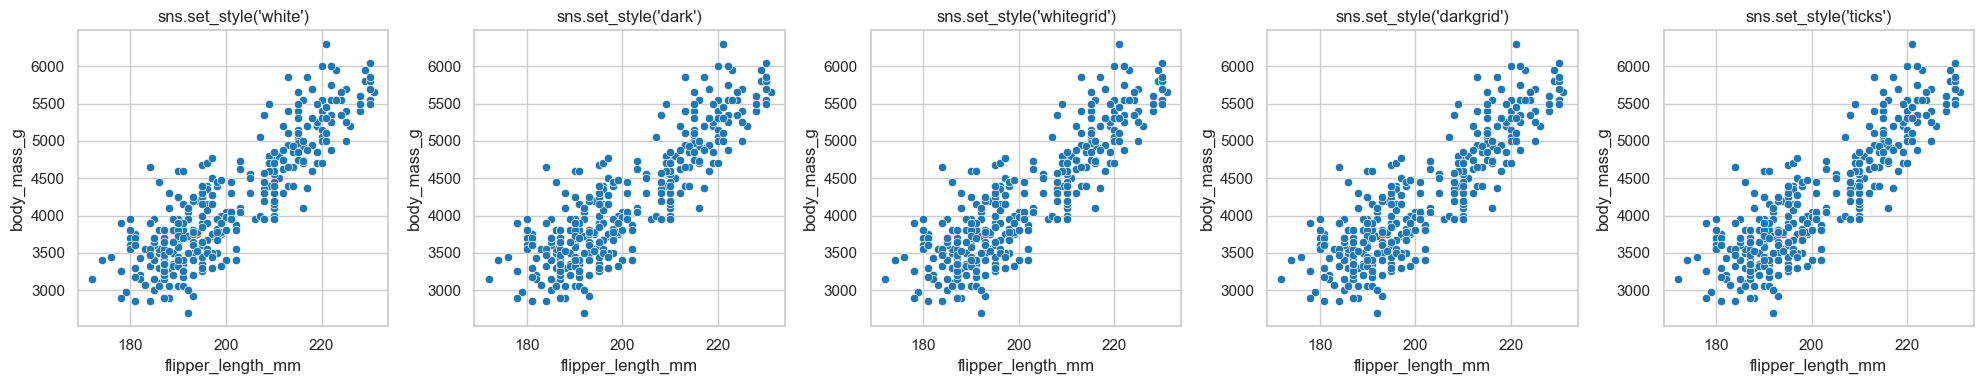

In [18]:
# Different style options
styles = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, style in enumerate(styles):
    sns.set_style(style)
    sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', ax=axes[i])
    axes[i].set_title(f'sns.set_style(\'{style}\')')

plt.tight_layout()
plt.show()

# Reset to default style
sns.set_style('whitegrid')

### 2.2 Setting Context (Text Sizes)

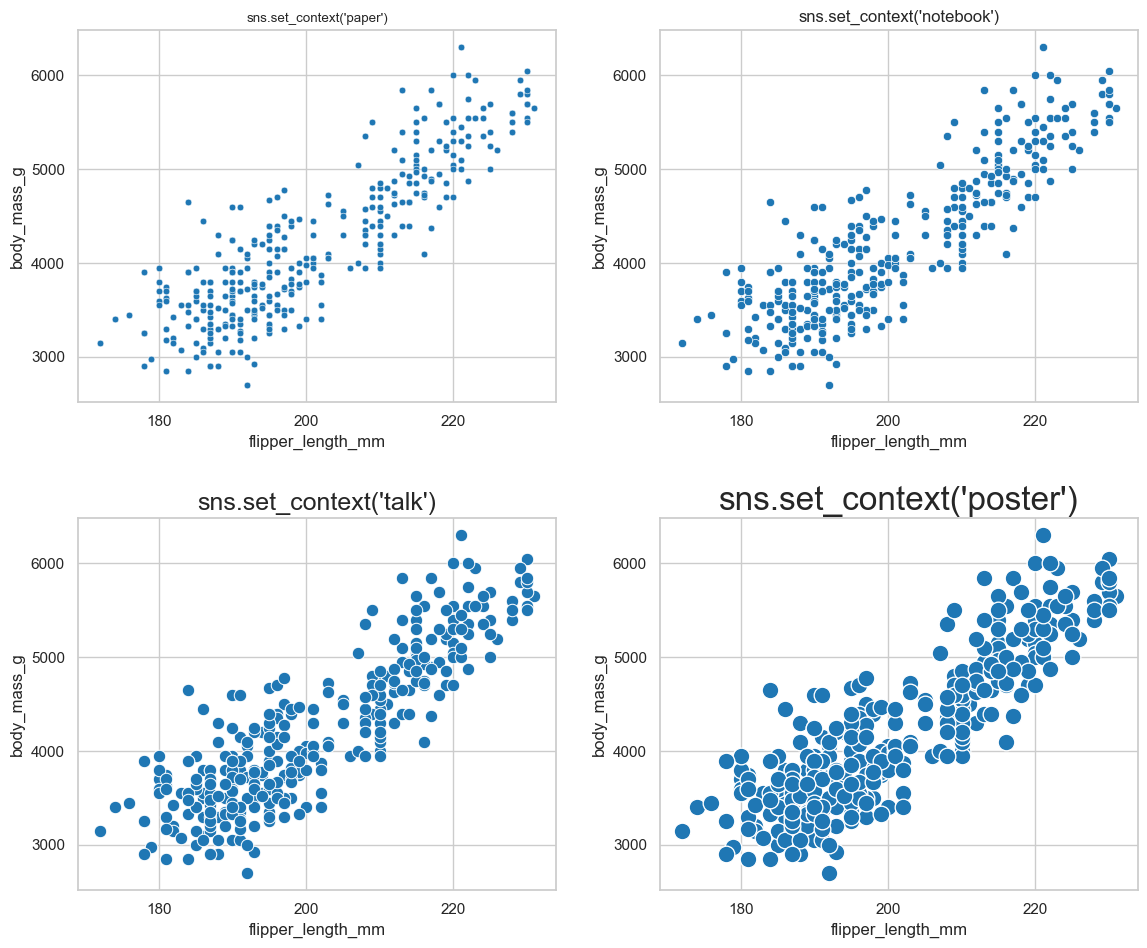

In [19]:
# Different context options
contexts = ['paper', 'notebook', 'talk', 'poster']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, context in enumerate(contexts):
    sns.set_context(context)
    sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', ax=axes[i])
    axes[i].set_title(f'sns.set_context(\'{context}\')')

plt.tight_layout()
plt.show()

# Reset to default context
sns.set_context('notebook')

### 2.3 Removing Spines with despine()

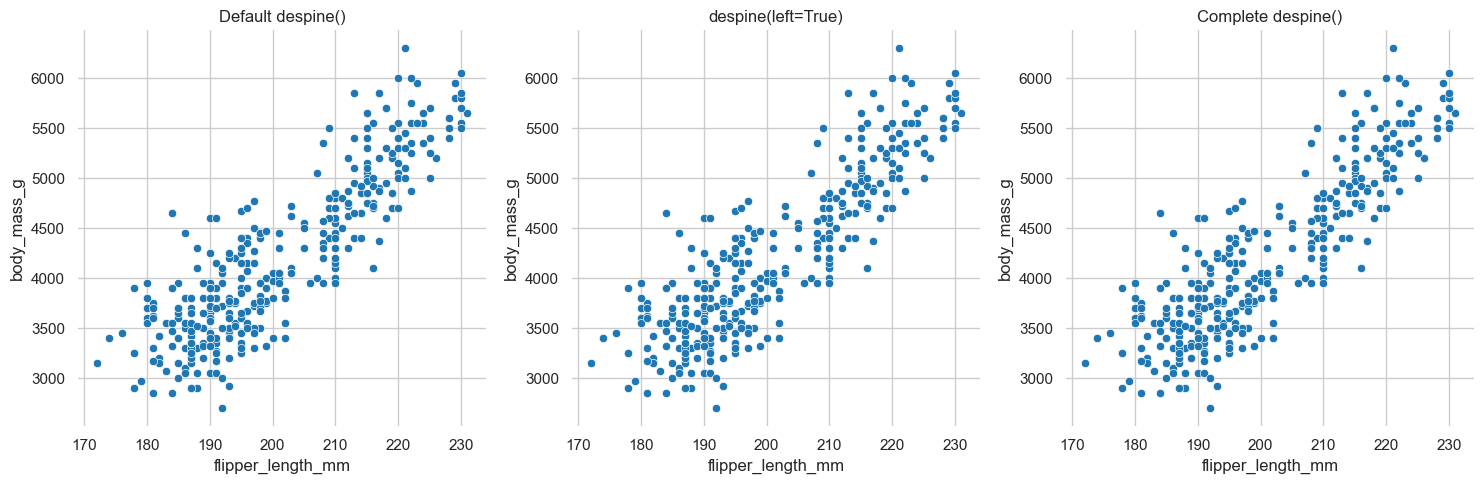

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Default despine (removes top and right)
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', ax=axes[0])
sns.despine()
axes[0].set_title('Default despine()')

# Remove left spine
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', ax=axes[1])
sns.despine(left=True)
axes[1].set_title('despine(left=True)')

# Remove all spines
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', ax=axes[2])
sns.despine(left=True, bottom=True, top=True, right=True)
axes[2].set_title('Complete despine()')

plt.tight_layout()
plt.show()

<a id='core-parameters'></a>
## 3. Core Plotting Parameters

### 3.1 Basic Data and Axis Parameters

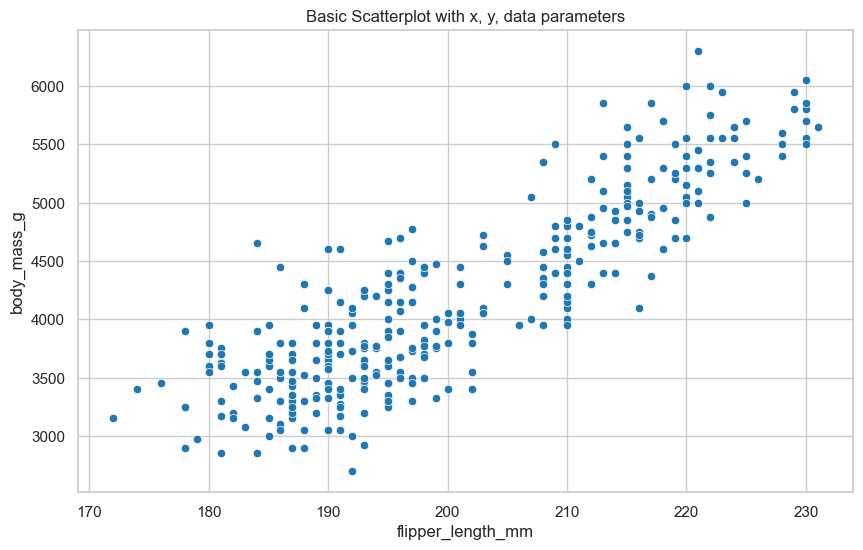

In [21]:
# Basic scatterplot with x, y, and data parameters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g'
)
plt.title('Basic Scatterplot with x, y, data parameters')
plt.show()

### 3.2 Using hue for Color Coding

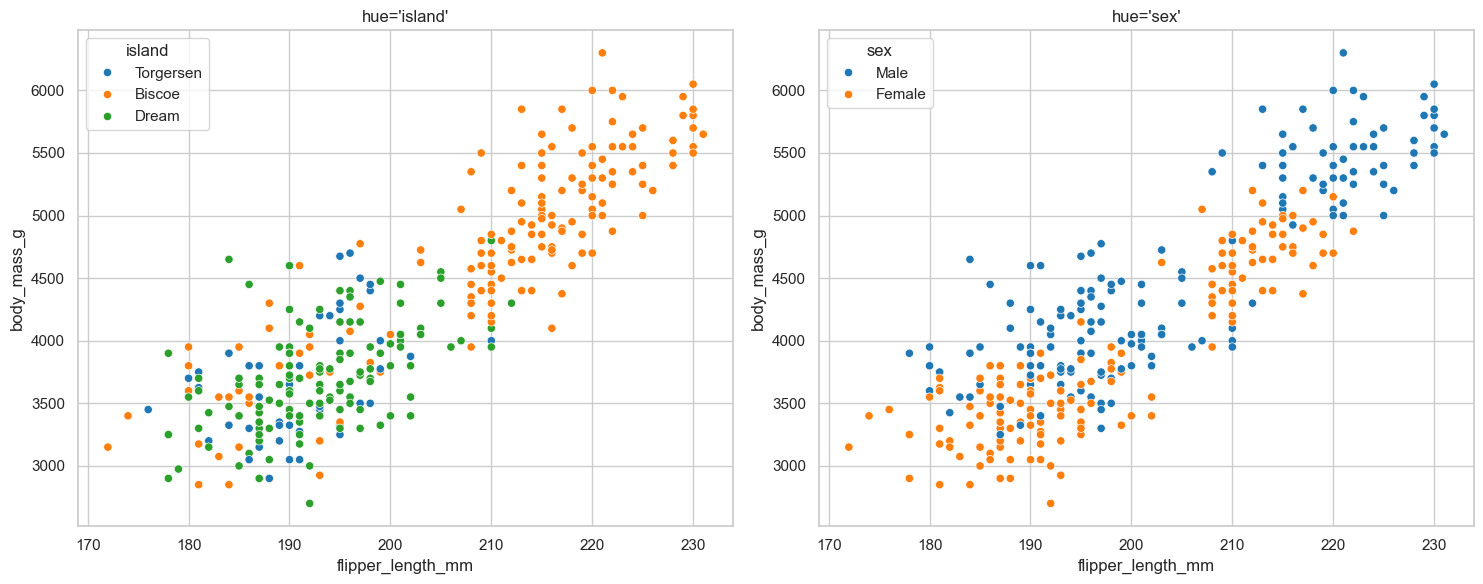

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Color by island
sns.scatterplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g',
    hue='island',
    ax=axes[0]
)
axes[0].set_title('hue=\'island\'')

# Color by sex
sns.scatterplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g',
    hue='sex',
    ax=axes[1]
)
axes[1].set_title('hue=\'sex\'')

plt.tight_layout()
plt.show()

### 3.3 Palette Options

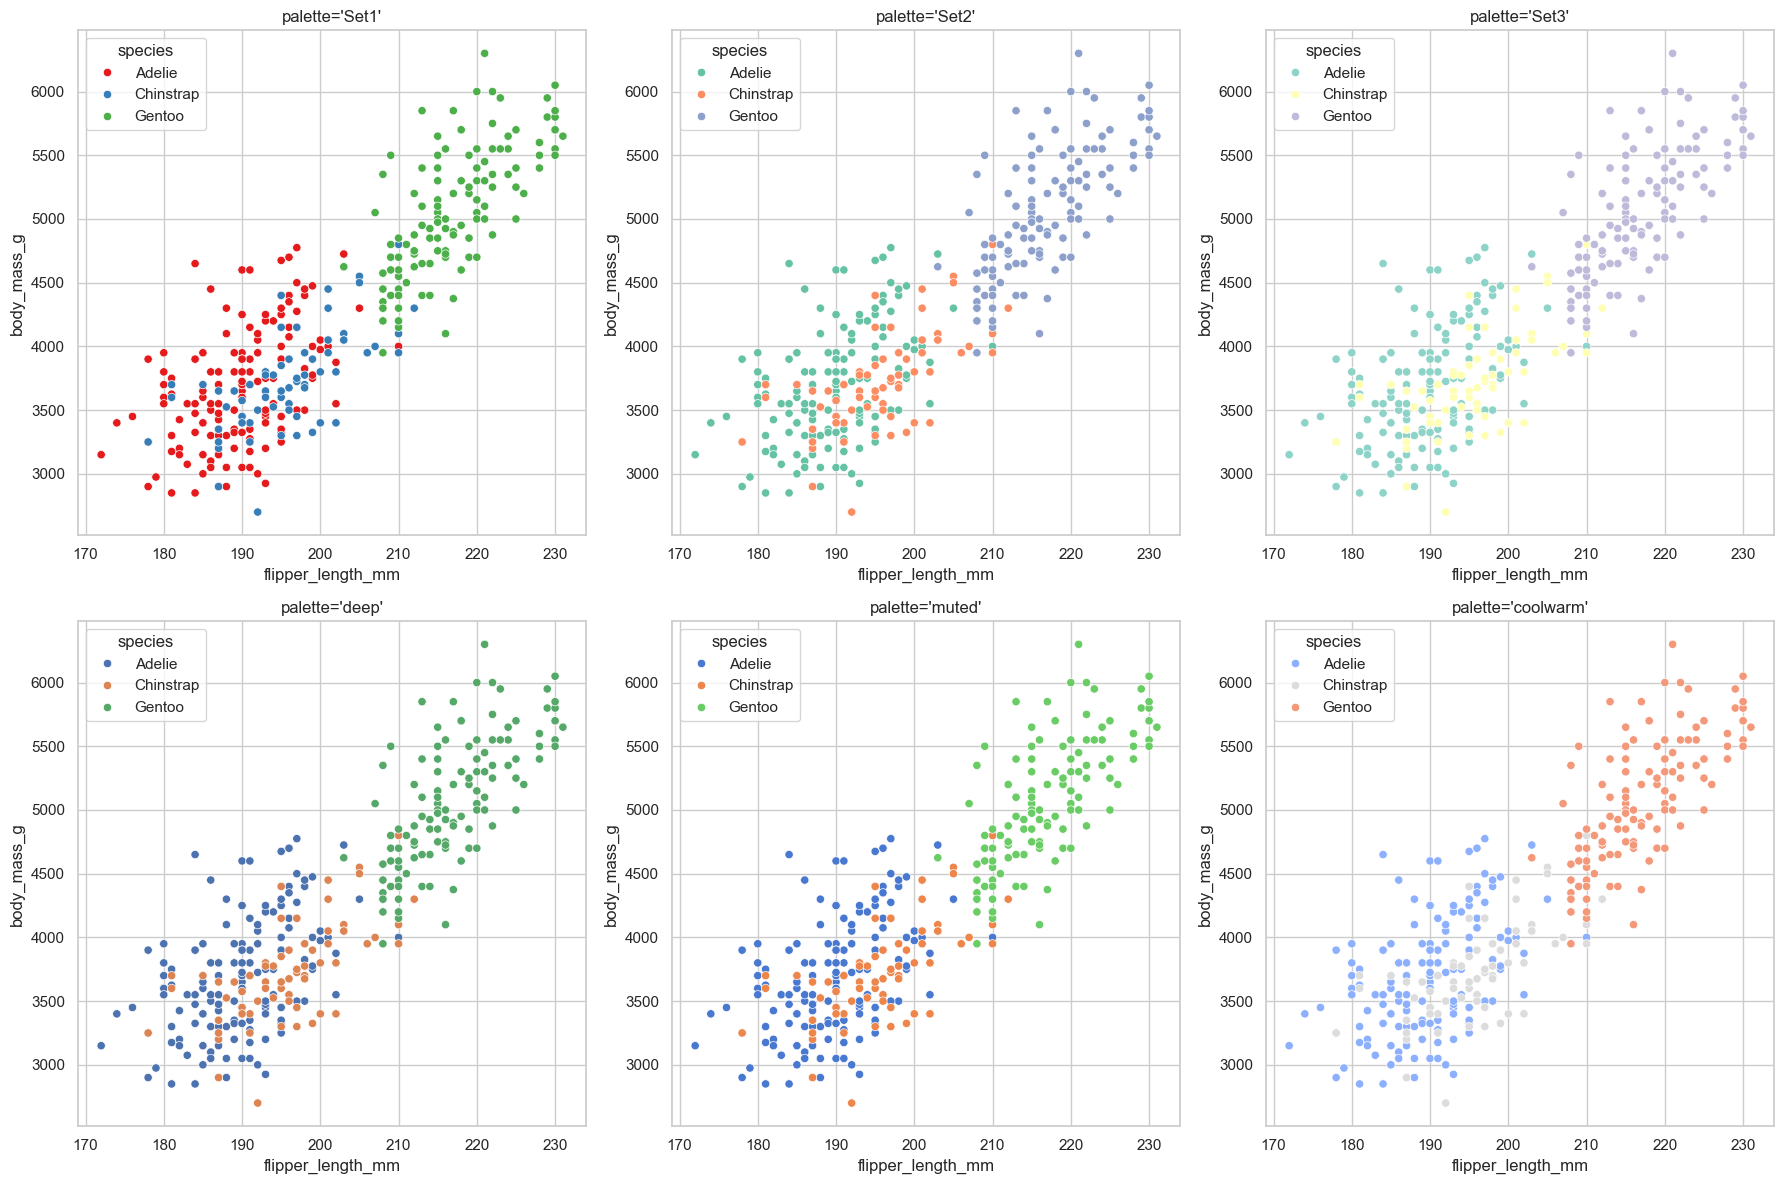

In [23]:
palettes = ['Set1', 'Set2', 'Set3', 'deep', 'muted', 'coolwarm']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, palette in enumerate(palettes):
    sns.scatterplot(
        data=penguins, 
        x='flipper_length_mm', 
        y='body_mass_g',
        hue='species',
        palette=palette,
        ax=axes[i]
    )
    axes[i].set_title(f'palette=\'{palette}\'')

plt.tight_layout()
plt.show()

### 3.4 Style Parameter (Marker Styles)

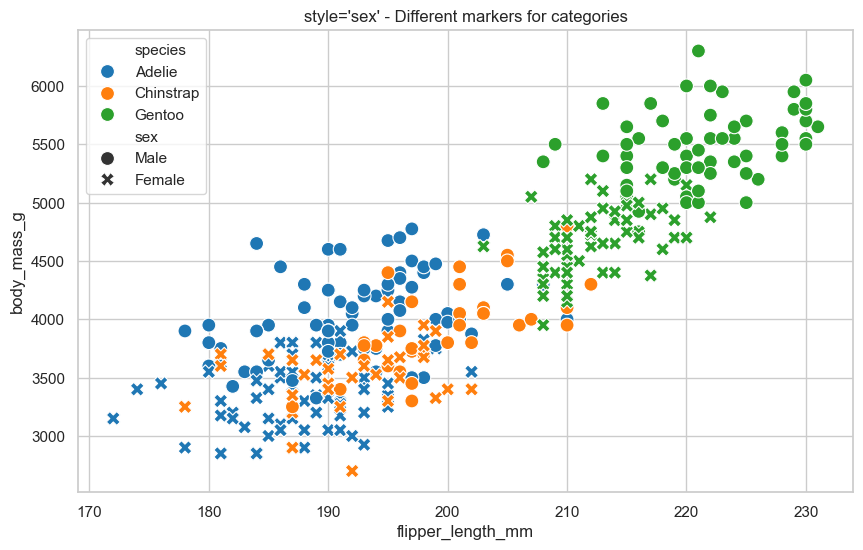

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g',
    hue='species',
    style='sex',  # Different markers for male/female
    s=100
)
plt.title('style=\'sex\' - Different markers for categories')
plt.show()

### 3.5 Alpha (Transparency)

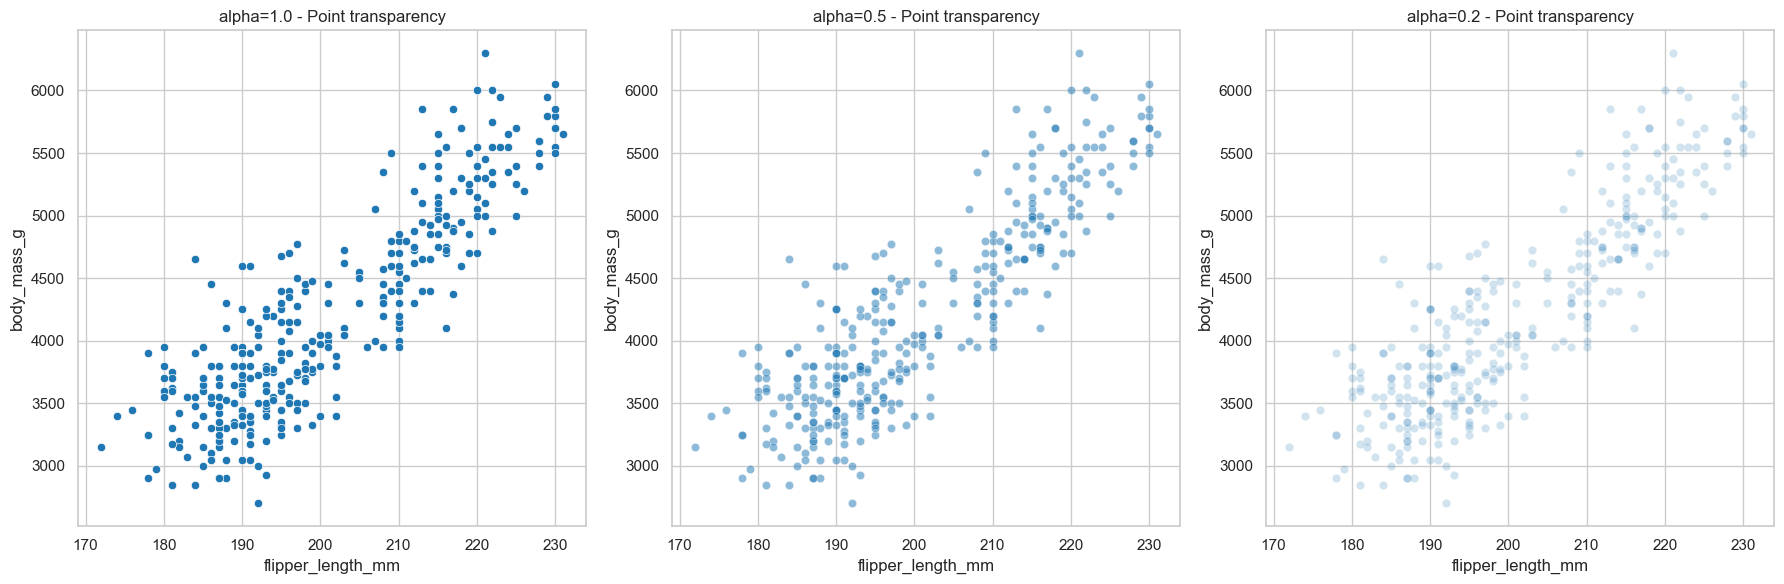

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

alphas = [1.0, 0.5, 0.2]

for i, alpha_val in enumerate(alphas):
    sns.scatterplot(
        data=penguins, 
        x='flipper_length_mm', 
        y='body_mass_g',
        alpha=alpha_val,
        ax=axes[i]
    )
    axes[i].set_title(f'alpha={alpha_val} - Point transparency')

plt.tight_layout()
plt.show()

### 3.6 Dodge Parameter

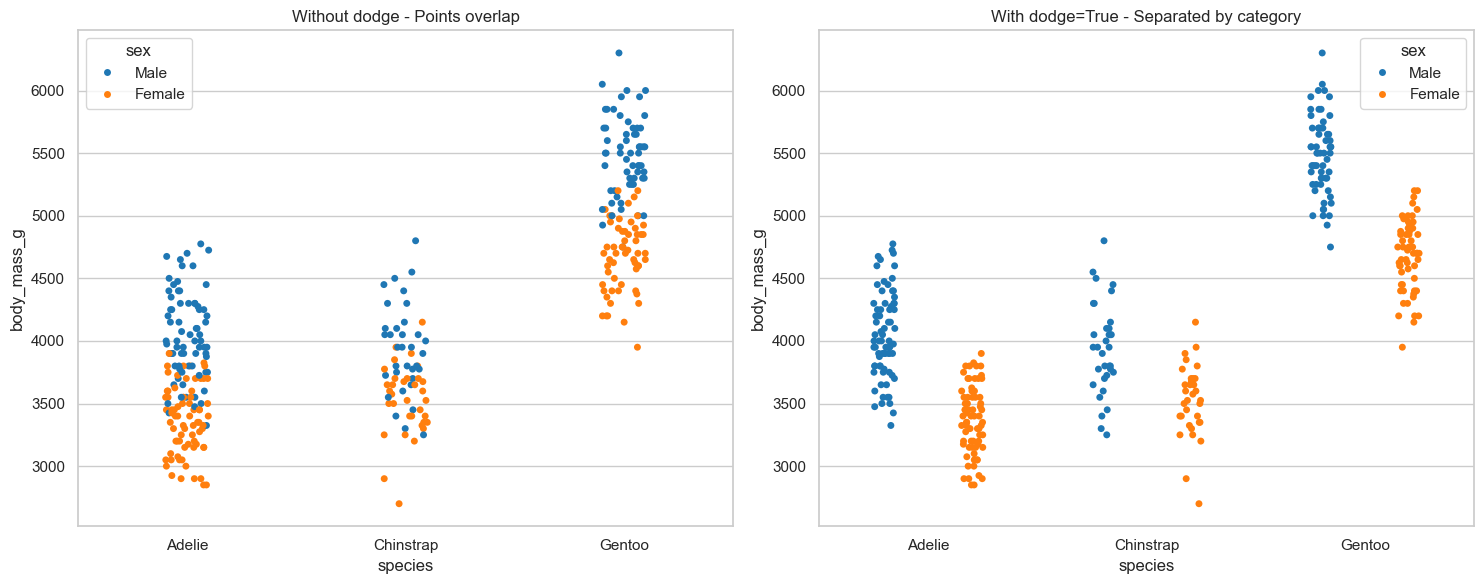

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Without dodge
sns.stripplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    hue='sex',
    ax=axes[0]
)
axes[0].set_title('Without dodge - Points overlap')

# With dodge
sns.stripplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    hue='sex',
    dodge=True,  # Separates points by hue
    ax=axes[1]
)
axes[1].set_title('With dodge=True - Separated by category')

plt.tight_layout()
plt.show()

### 3.7 Jitter Parameter

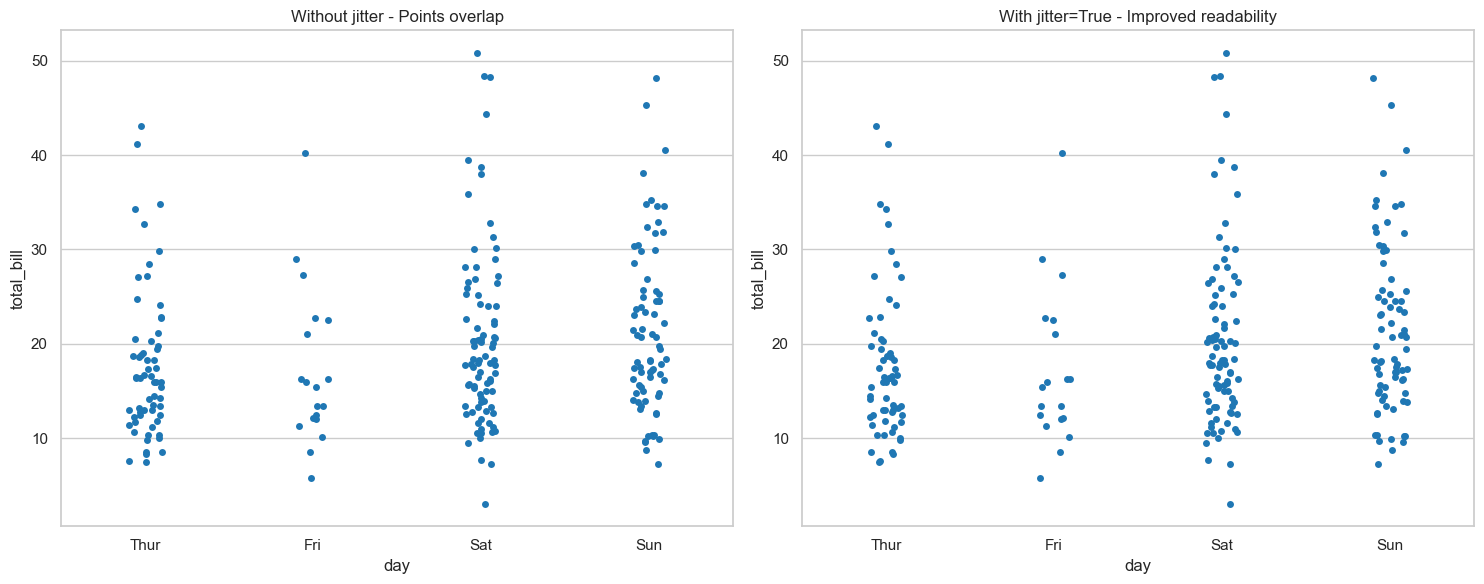

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Without jitter
sns.stripplot(
    data=tips, 
    x='day', 
    y='total_bill',
    ax=axes[0]
)
axes[0].set_title('Without jitter - Points overlap')

# With jitter
sns.stripplot(
    data=tips, 
    x='day', 
    y='total_bill',
    jitter=True,  # Adds random spread
    ax=axes[1]
)
axes[1].set_title('With jitter=True - Improved readability')

plt.tight_layout()
plt.show()

### 3.8 Size Parameter

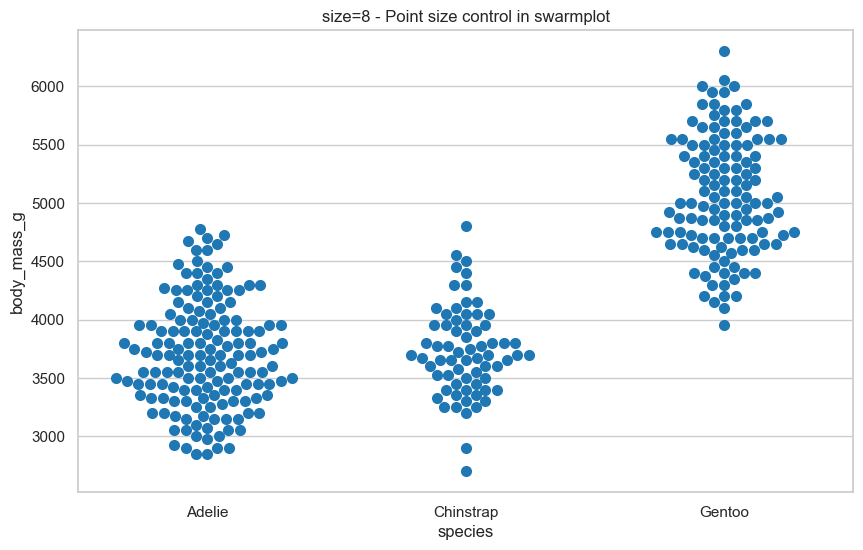

In [28]:
plt.figure(figsize=(10, 6))
sns.swarmplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    size=8  # Controls point size
)
plt.title('size=8 - Point size control in swarmplot')
plt.show()

<a id='plot-specific'></a>
## 4. Plot-Specific Functions and Parameters

### 4.1 Histogram - multiple parameter

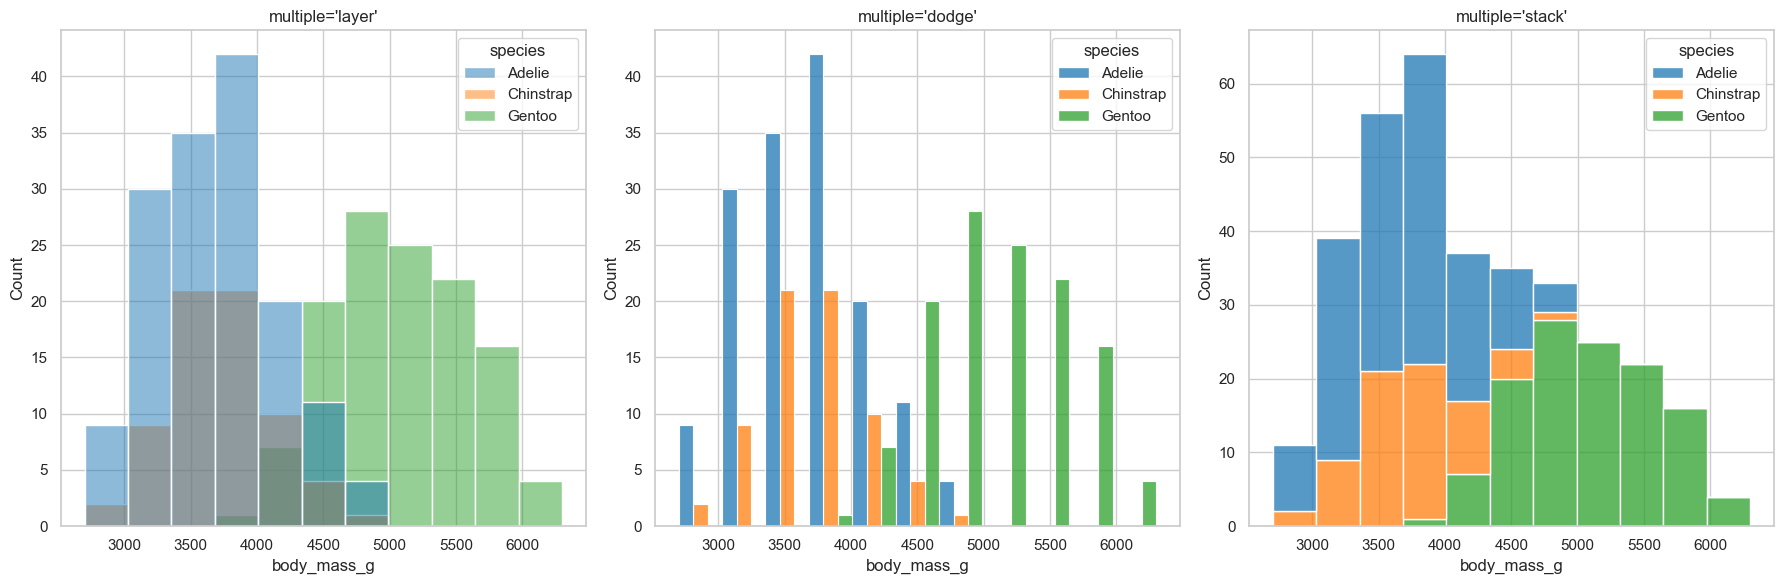

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Layer (default)
sns.histplot(
    data=penguins, 
    x='body_mass_g',
    hue='species',
    multiple='layer',
    ax=axes[0]
)
axes[0].set_title('multiple=\'layer\'')

# Dodge
sns.histplot(
    data=penguins, 
    x='body_mass_g',
    hue='species',
    multiple='dodge',
    ax=axes[1]
)
axes[1].set_title('multiple=\'dodge\'')

# Stack
sns.histplot(
    data=penguins, 
    x='body_mass_g',
    hue='species',
    multiple='stack',
    ax=axes[2]
)
axes[2].set_title('multiple=\'stack\'')

plt.tight_layout()
plt.show()

### 4.2 Confidence Intervals (ci parameter)

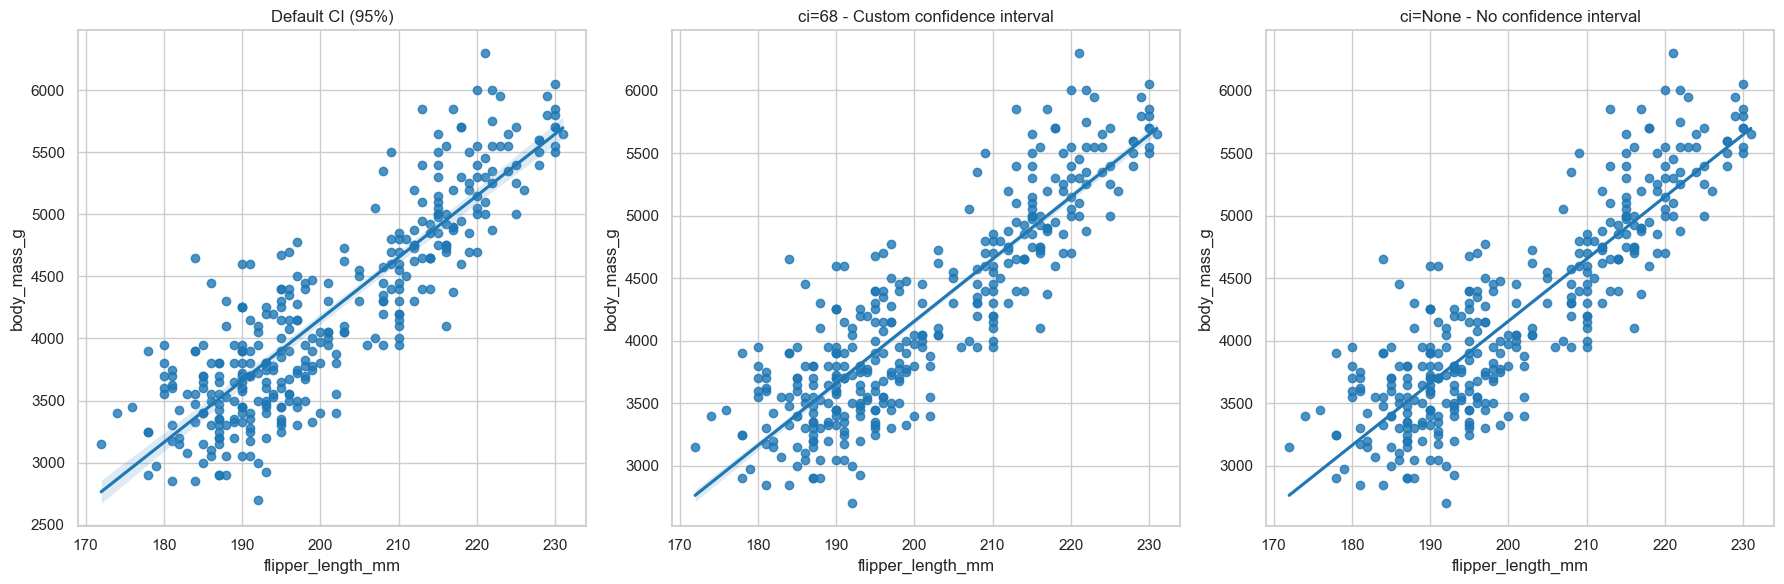

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Default CI (95%)
sns.regplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g',
    ax=axes[0]
)
axes[0].set_title('Default CI (95%)')

# Custom CI
sns.regplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g',
    ci=68,  # 68% confidence interval
    ax=axes[1]
)
axes[1].set_title('ci=68 - Custom confidence interval')

# No CI
sns.regplot(
    data=penguins, 
    x='flipper_length_mm', 
    y='body_mass_g',
    ci=None,  # Hide confidence interval
    ax=axes[2]
)
axes[2].set_title('ci=None - No confidence interval')

plt.tight_layout()
plt.show()

### 4.3 Estimator Function

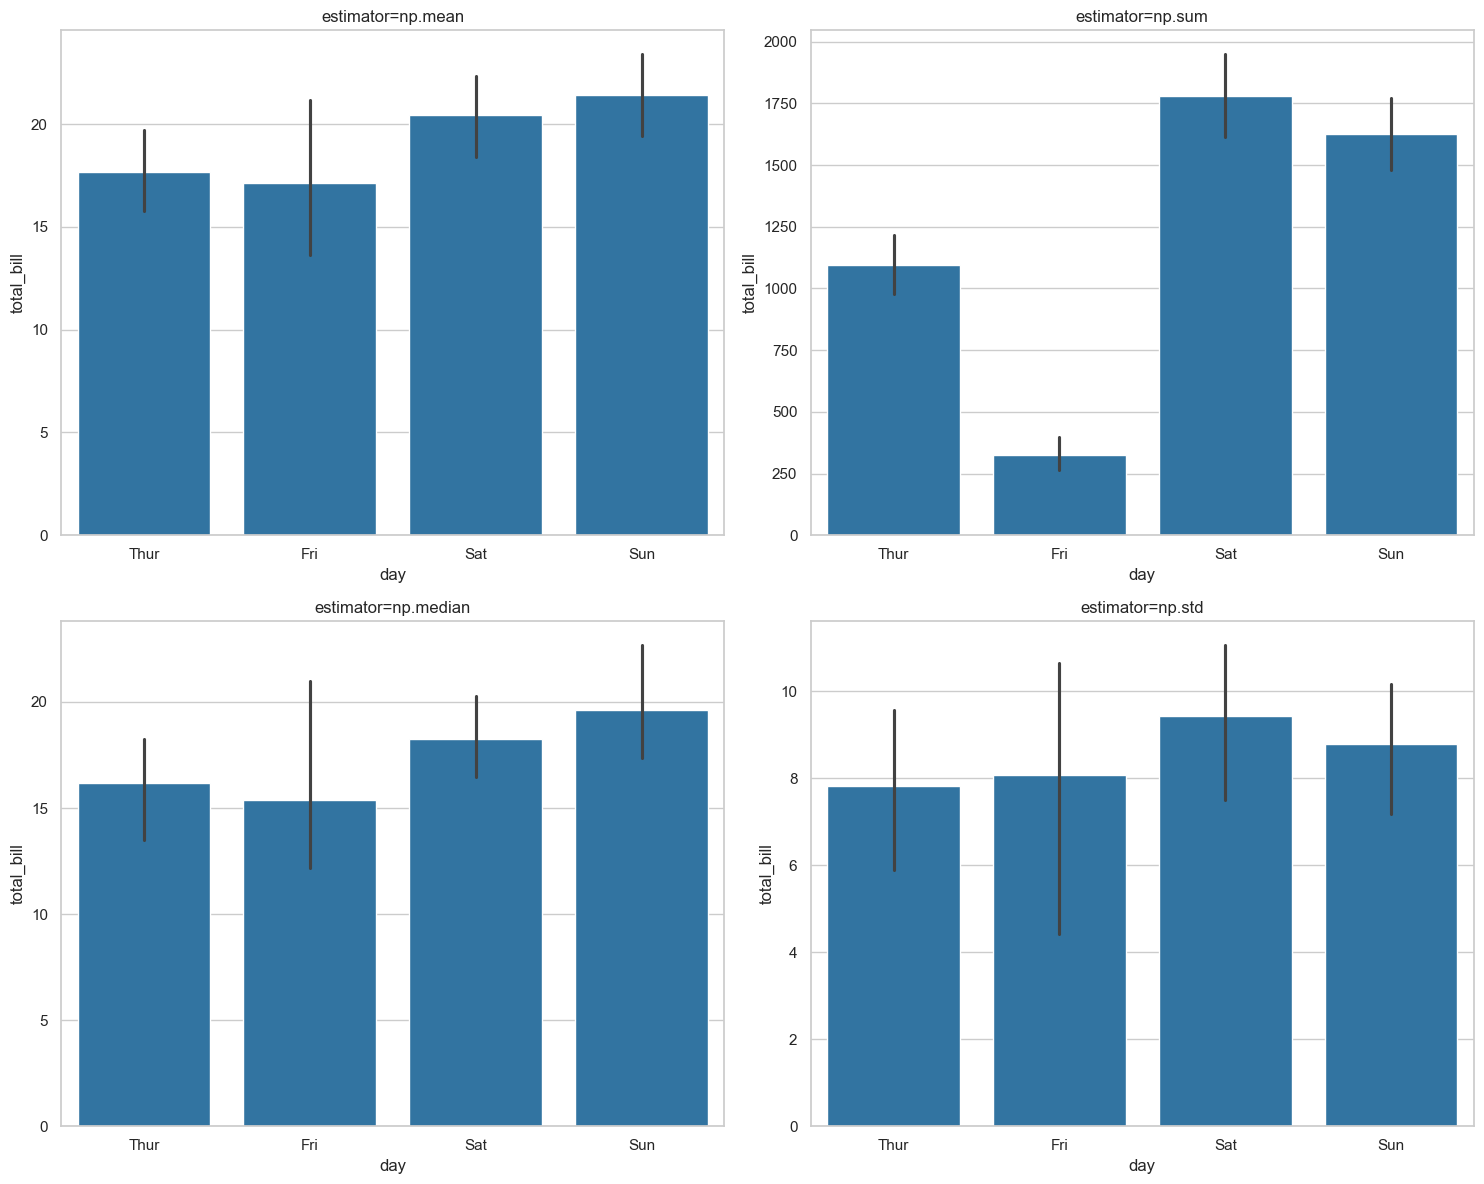

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

estimators = [np.mean, np.sum, np.median, np.std]
names = ['mean', 'sum', 'median', 'std']

for i, (est, name) in enumerate(zip(estimators, names)):
    sns.barplot(
        data=tips, 
        x='day', 
        y='total_bill',
        estimator=est,
        ax=axes[i]
    )
    axes[i].set_title(f'estimator=np.{name}')

plt.tight_layout()
plt.show()

### 4.4 Jointplot - kind parameter

ValueError: Can not reset the Axes. You are probably trying to reuse an artist in more than one Axes which is not supported

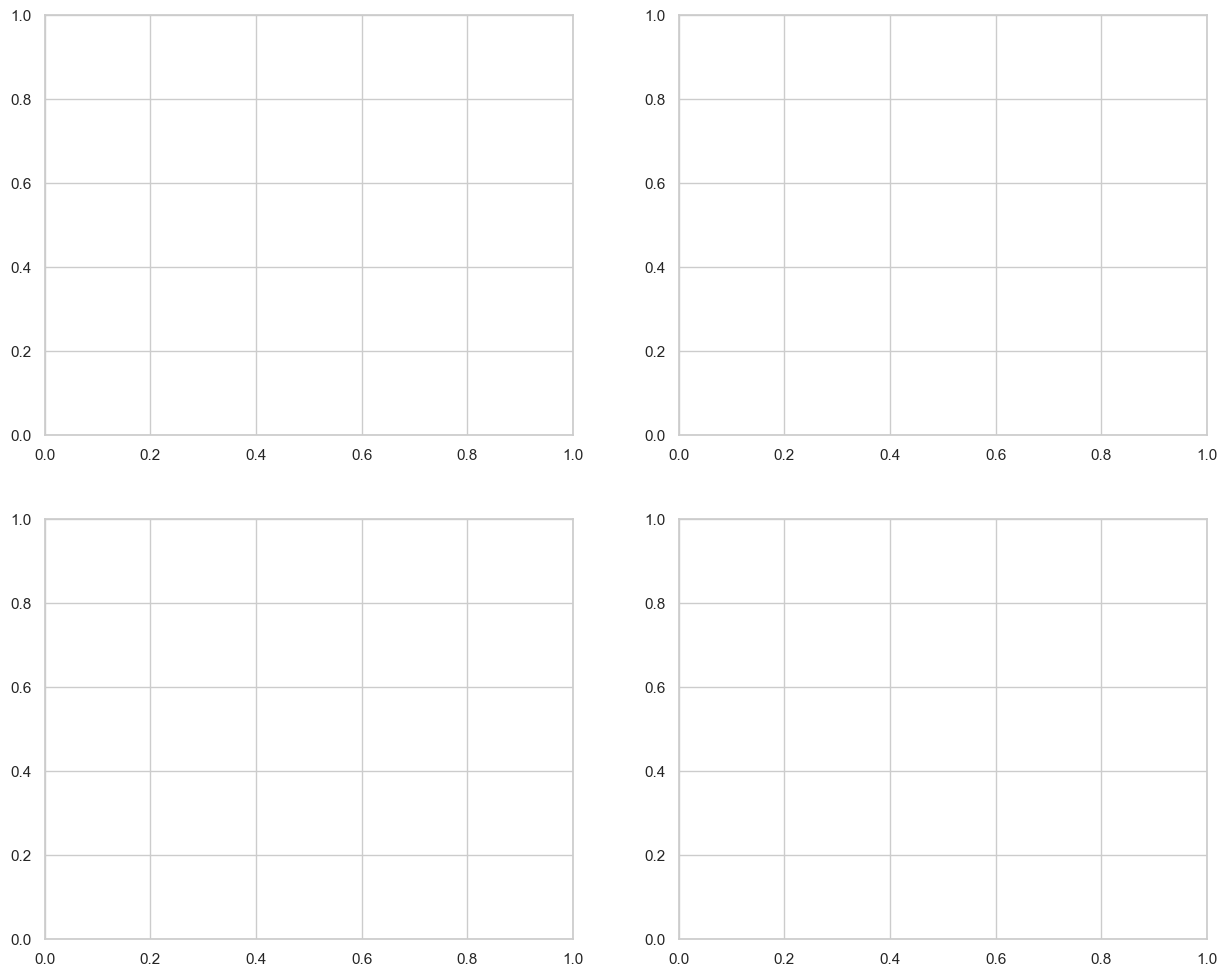

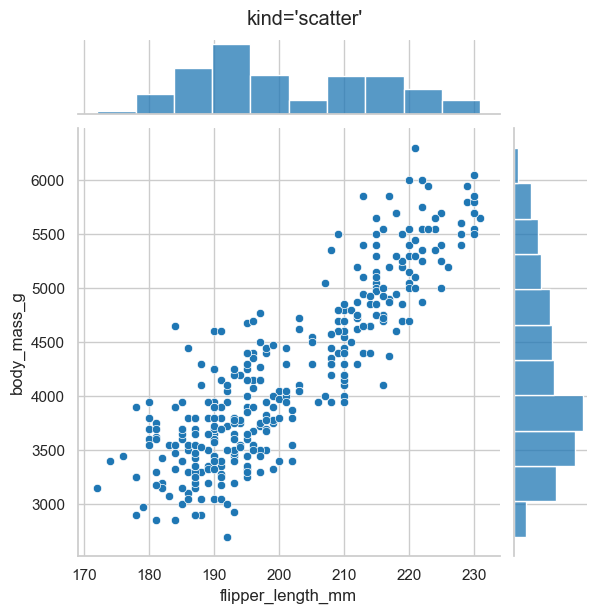

In [32]:
kinds = ['scatter', 'reg', 'hex', 'kde']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, kind in enumerate(kinds):
    # Create jointplot
    g = sns.jointplot(
        data=penguins, 
        x='flipper_length_mm', 
        y='body_mass_g',
        kind=kind
    )
    g.fig.suptitle(f'kind=\'{kind}\'', y=1.02)
    
    # Move to subplot
    for ax in g.fig.axes:
        axes[i].add_artist(ax)

plt.tight_layout()
plt.show()

### 4.5 Violin Plot Parameters

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Split violin plot
sns.violinplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    hue='sex',
    split=True,  # Side-by-side comparison
    ax=axes[0]
)
axes[0].set_title('split=True - Side-by-side violins')

# Inner box
sns.violinplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    inner='box',  # Show boxplot inside
    ax=axes[1]
)
axes[1].set_title('inner=\'box\'')

# Inner quartile
sns.violinplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    inner='quartile',  # Show quartiles
    ax=axes[2]
)
axes[2].set_title('inner=\'quartile\'')

# Inner point
sns.violinplot(
    data=penguins, 
    x='species', 
    y='body_mass_g',
    inner='point',  # Show individual points
    ax=axes[3]
)
axes[3].set_title('inner=\'point\'')

plt.tight_layout()
plt.show()

### 4.6 KDE Plot - fill parameter

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Filled KDE
sns.kdeplot(
    data=penguins, 
    x='body_mass_g',
    hue='species',
    fill=True,  # Solid areas
    ax=axes[0]
)
axes[0].set_title('fill=True - Solid KDE areas')

# Outline KDE
sns.kdeplot(
    data=penguins, 
    x='body_mass_g',
    hue='species',
    fill=False,  # Outline only
    ax=axes[1]
)
axes[1].set_title('fill=False - KDE outlines')

plt.tight_layout()
plt.show()

### 4.7 Heatmap Parameters

In [ ]:
# Create correlation matrix
corr_matrix = penguins.select_dtypes(include=[np.number]).corr()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Basic heatmap with annotations
sns.heatmap(
    corr_matrix,
    annot=True,  # Show correlation values
    cmap='coolwarm',
    ax=axes[0]
)
axes[0].set_title('annot=True - Show correlation values')

# Custom vmin/vmax
sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-0.5,  # Custom color scale bounds
    vmax=0.8,
    cmap='viridis',
    ax=axes[1]
)
axes[1].set_title('vmin=-0.5, vmax=0.8 - Custom color range')

# With linewidth
sns.heatmap(
    corr_matrix,
    annot=True,
    linewidth=0.5,  # Cell borders
    cmap='Blues',
    ax=axes[2]
)
axes[2].set_title('linewidth=0.5 - Cell borders')

# Mask for lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix,
    annot=True,
    mask=mask,
    cmap='RdYlBu_r',
    ax=axes[3]
)
axes[3].set_title('Masked upper triangle')

plt.tight_layout()
plt.show()

### 4.8 Rug Plot - height parameter

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

heights = [0.02, 0.1, 0.3]

for i, height in enumerate(heights):
    # Create histogram first
    sns.histplot(
        data=penguins, 
        x='body_mass_g',
        ax=axes[i]
    )
    # Add rug plot
    sns.rugplot(
        data=penguins, 
        x='body_mass_g',
        height=height,  # Rug line height
        ax=axes[i]
    )
    axes[i].set_title(f'height={height} - Rug line thickness')

plt.tight_layout()
plt.show()

### 4.9 Pairplot Parameters

In [ ]:
# Select specific variables
selected_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# vars parameter
g1 = sns.pairplot(
    data=penguins,
    vars=selected_vars  # Specific columns only
)
g1.fig.suptitle('vars=[selected columns]', y=1.02)

# diag_kind parameter
g2 = sns.pairplot(
    data=penguins,
    vars=selected_vars,
    diag_kind='kde'  # KDE on diagonal instead of histogram
)
g2.fig.suptitle('diag_kind=\'kde\'', y=1.02)

# corner parameter
g3 = sns.pairplot(
    data=penguins,
    vars=selected_vars,
    corner=True  # Lower triangle only
)
g3.fig.suptitle('corner=True - Lower triangle', y=1.02)

plt.tight_layout()
plt.show()

<a id='advanced-grids'></a>
## 5. Advanced Grid Functions - PairGrid

### 5.1 Manual Mapping with PairGrid

In [ ]:
# Create PairGrid
g = sns.PairGrid(
    data=penguins,
    vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
    hue='species'
)

# Map different functions to different parts
g.map_upper(sns.scatterplot)  # Upper triangle
g.map_lower(sns.kdeplot)      # Lower triangle
g.map_diag(sns.histplot)      # Diagonal

g.add_legend()
g.fig.suptitle('PairGrid with manual map functions', y=1.02)
plt.show()

### 5.2 Custom PairGrid Example

In [ ]:
# More complex PairGrid
g = sns.PairGrid(
    data=penguins,
    vars=['bill_length_mm', 'bill_depth_mm'],
    hue='sex',
    palette='Set1'
)

# Different mapping strategies
g.map_upper(sns.scatterplot, alpha=0.7)
g.map_lower(sns.regplot, scatter=False)
g.map_diag(sns.kdeplot, fill=True)

g.add_legend(title='Sex')
g.fig.suptitle('Custom PairGrid mapping', y=1.02)
plt.show()

## Quick Reference Summary

### Styling Functions:
- `sns.set_style()` - Background/theme
- `sns.set_context()` - Text sizes
- `sns.despine()` - Remove plot borders

### Core Parameters:
- `data` - Dataset to plot
- `x, y` - Axis variables
- `hue` - Color by category
- `palette` - Color schemes
- `style` - Marker/line styles
- `alpha` - Transparency
- `dodge` - Separate categorical points
- `jitter` - Random spread for readability
- `size` - Point size control

### Plot-Specific:
- `multiple` - Histogram stacking
- `ci` - Confidence intervals
- `estimator` - Aggregation functions
- `kind` - Plot types
- `split` - Split violin plots
- `inner` - Violin plot contents
- `fill` - KDE area filling
- `annot` - Heatmap values
- `vmin/vmax` - Color scale bounds
- `linewidth` - Cell borders
- `height` - Rug line thickness
- `vars` - Pairplot columns
- `diag_kind` - Diagonal plot types
- `corner` - Show triangle only

### Advanced Grids:
- `PairGrid` - Manual grid mapping
- `map_*()` - Functions for grid sections

## Best Practices

1. **Always start with basic styling** using `set_style()` and `set_context()`
2. **Use `hue` strategically** to show relationships between variables
3. **Consider data type** when choosing parameters (categorical vs numerical)
4. **Use `despine()`** for cleaner, modern-looking plots
5. **Experiment with palettes** to find the most readable color scheme
6. **Use `alpha`** for overlapping data points
7. **Combine parameters** for rich, informative visualizations

Happy plotting! 📊🎨